# 볼린저 밴드

## 1. 볼린저 밴드 어디에 주가가 위치하는지 나타내는 지표 %b
### - 종가 - 하단 볼린저 밴드 / 상단 - 하단 볼린저 밴드

## 2. 스퀴즈를 감지하는 지표 밴드폭
### - 상단 - 하단 볼린저 밴드 / 중간 볼린저 밴드


# 국내

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Administrator/Desktop/stock_study/')

from Investar import Analyzer

In [2]:
mk = Analyzer.MarketDB()

In [3]:
df = mk.get_daily_price("삼성전자","2019-06-14" ,"2021-01-06")

In [4]:
df["MA20"] = df.close.rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구한다 (20일 이평선) => 중간 볼린저 밴드
df['stddev'] = df.close.rolling(window=20).std() # 20개 종가를 이용해서 표준편차를 구한 뒤 stddev에 추가
df["upper"] = df["MA20"] + (df.stddev*2)         # 중간 볼린저 밴드 + ( 2 * 표준편차) => 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df.stddev*2)         # 중간 볼린저 밴드 - ( 2 * 표준편차) => 하단 볼린저 밴드
df["PB"] = (df.close-df.lower) / (df.upper - df. lower) 
df["bandwidth"] = (df.upper - df.lower) / df["MA20"]
df = df[19:]

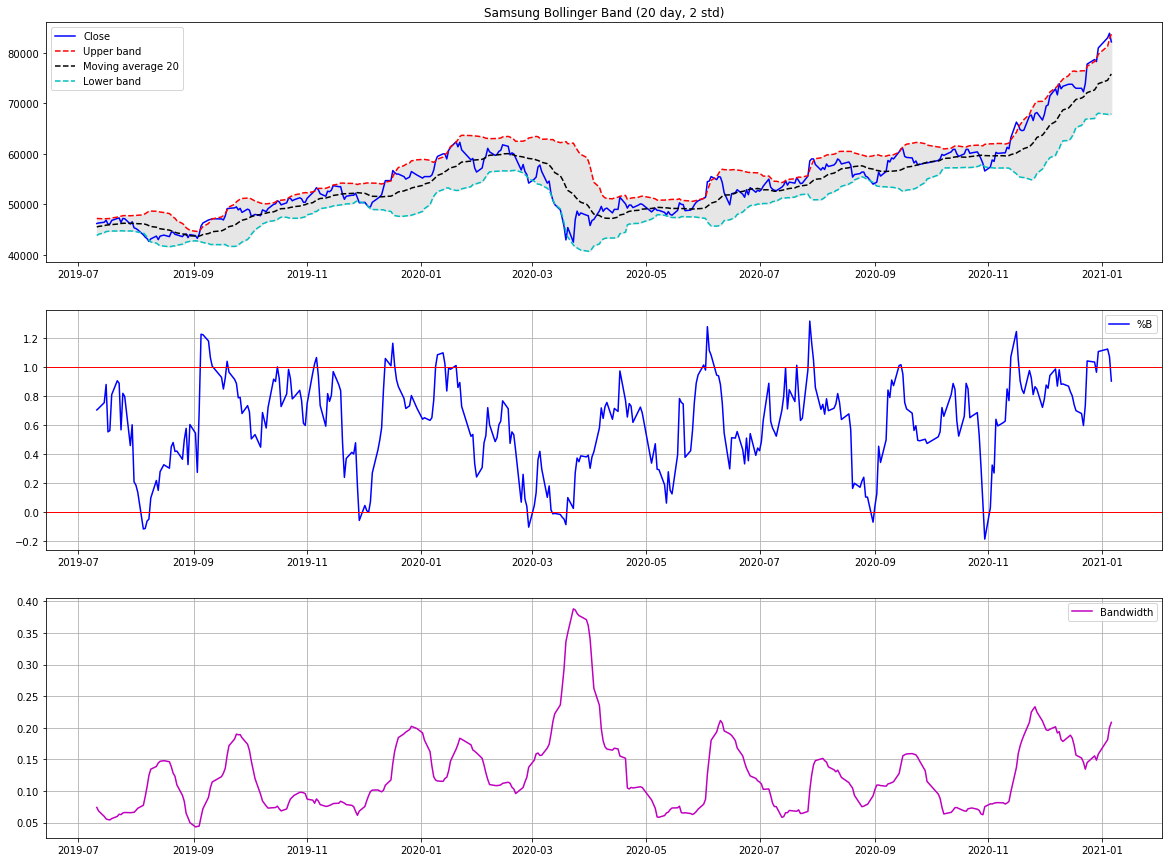

In [5]:
plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(df.index, df.close, color = "#0000ff", label = "Close") # 파란색
plt.plot(df.index, df.upper, 'r--', label ="Upper band")
plt.plot(df.index, df["MA20"], 'k--', label ="Moving average 20")
plt.plot(df.index, df.lower, 'c--', label ="Lower band")
plt.fill_between(df.index, df.upper, df.lower, color = '0.9')
plt.legend(loc = 'best')
plt.title("Samsung Bollinger Band (20 day, 2 std)")

plt.subplot(312)
plt.plot(df.index, df.PB, color = "b", label="%B")
plt.axhline(y=1, color='r', linewidth=1)
plt.axhline(y=0, color='r', linewidth=1)
plt.grid(True)
plt.legend(loc="best")


plt.subplot(313)
plt.plot(df.index, df.bandwidth, color="m", label="Bandwidth")
plt.grid(True)
plt.legend(loc="best")
plt.show()

# 미국

In [6]:
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
df = pdr.get_data_yahoo("TSLA", start = "2019-06-14",end ="2021-01-06")

[*********************100%***********************]  1 of 1 completed


In [8]:
df["MA20"] = df["Adj Close"].rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구한다 (20일 이평선) => 중간 볼린저 밴드
df['stddev'] = df["Adj Close"].rolling(window=20).std() # 20개 종가를 이용해서 표준편차를 구한 뒤 stddev에 추가
df["upper"] = df["MA20"] + (df.stddev*2)         # 중간 볼린저 밴드 + ( 2 * 표준편차) => 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df.stddev*2)         # 중간 볼린저 밴드 - ( 2 * 표준편차) => 하단 볼린저 밴드
df["PB"] = (df["Adj Close"]-df.lower) / (df.upper - df. lower) 
df["bandwidth"] = (df.upper - df.lower) / df["MA20"]
df = df[19:]

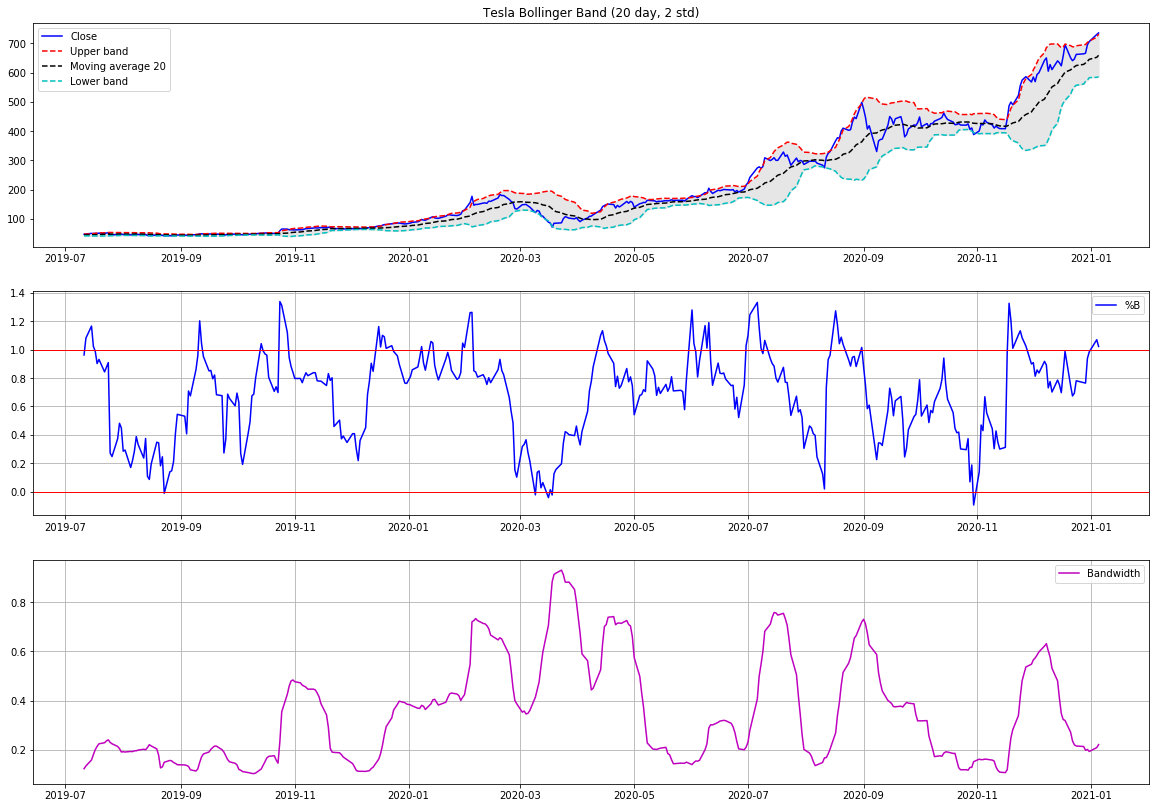

In [9]:
plt.figure(figsize=(20,14))
plt.subplot(311)
plt.plot(df.index, df["Adj Close"], color = "#0000ff", label = "Close") # 파란색
plt.plot(df.index, df.upper, 'r--', label ="Upper band")
plt.plot(df.index, df["MA20"], 'k--', label ="Moving average 20")
plt.plot(df.index, df.lower, 'c--', label ="Lower band")
plt.fill_between(df.index, df.upper, df.lower, color = '0.9')
plt.legend(loc = 'best')
plt.title("Tesla Bollinger Band (20 day, 2 std)")


plt.subplot(312)
plt.plot(df.index, df.PB, color = "b", label="%B")
plt.axhline(y=1, color='r', linewidth=1)
plt.axhline(y=0, color='r', linewidth=1)
plt.grid(True)
plt.legend(loc="best")


plt.subplot(313)
plt.plot(df.index, df.bandwidth, color="m", label="Bandwidth")
plt.grid(True)
plt.legend(loc="best")
plt.show()